<a href="https://colab.research.google.com/github/UBC-Astrophysics/QEDSurface/blob/master/magnetar.py/Condensed_Free_Ion-CondCap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get the entire repository

In [1]:
# Get the entire archive (maybe you already have it)
# ! git clone https://github.com/UBC-Astrophysics/QEDSurface.git

In [2]:
# change the directory if you have to
# import os
# os.chdir('QEDSurface/magnetar.py')


In [3]:
# update just in case
# ! git pull

# Load Libraries

In [4]:
import Magnetar
import numpy as np


import matplotlib.pyplot as plt

# Create the double condensed surface map

## Put in the surface maps using the dipole pattern

In [5]:
mysurfmodel=Magnetar.dipole_model(Magnetar.condensed_surface,0.6,1.25e14,70565.,fixed_ions=False)
#mysurfmodel=Magnetar.dipole_model(Magnetar.condensed_,0.6,1.25e14,freq_power=2,sigma_power=4/13,kb_suppress=True,limb_darkening=True)


/home/idies/workspace/Storage/heyl/persistent/QEDSurface/magnetar.py/Magnetar/condensed.py:185: RuntimeWarning: invalid value encountered in sqrt
  n0m=sqrt(1.-epe**2/(ece*(ene-eci)))
/home/idies/workspace/Storage/heyl/persistent/QEDSurface/magnetar.py/Magnetar/condensed.py:218: RuntimeWarning: invalid value encountered in sqrt
  nt=sqrt(1.-epet**2/(ece*(ene-eci)))
/home/idies/workspace/Storage/heyl/persistent/QEDSurface/magnetar.py/Magnetar/condensed.py:185: RuntimeWarning: invalid value encountered in sqrt
  n0m=sqrt(1.-epe**2/(ece*(ene-eci)))
/home/idies/workspace/Storage/heyl/persistent/QEDSurface/magnetar.py/Magnetar/condensed.py:218: RuntimeWarning: invalid value encountered in sqrt
  nt=sqrt(1.-epet**2/(ece*(ene-eci)))


## Add the polar cap and its edge

In [6]:
#mysurfmodel=Magnetar.dipole_model(Magnetar.condensed_surface,1,1e13,70565.,fixed_ions=False)
# The first two are the hot spot
cap1=Magnetar.condensed_surface(1.4,1.25e14,0.0,70565.,fixed_ions=False)
cap2=Magnetar.condensed_surface(1.4,1.25e14,1.5,70565.,fixed_ions=False)
# This is just past the edge of the hot spot (so cold)
#cap3=Magnetar.dipole_model(Magnetar.condensed_surface,0.8,1.25e14,70565.,fixed_ions=False)
cap3=Magnetar.condensed_surface(0.6,1.25e14,1.6,70565.,fixed_ions=False)
mysurfmodel.add_patch(cap1,0)
mysurfmodel.add_patch(cap2,3)
mysurfmodel.add_patch(cap3,3.2)
mysurfmodel.sort_patches()

## Add the back of the star by copying from the front

In [7]:
aa=mysurfmodel.mcolat
# copy the front surface to the back of the star
# add the angles
mysurfmodel.mcolat=aa+[180-i for i in aa[::-1]]
# add the patches
mysurfmodel.patches=mysurfmodel.patches+mysurfmodel.patches[::-1]

# Work with a single orientation

## Load the propagation file (pfield)

In [8]:
pfield_test=Magnetar.pfield().loaddata('Sample_Pfields/pfield_models_QED/pfield_5keV_30deg')

## Calculate intensities across the image

In [9]:
pfield_test.recalculate(1.65426,mysurfmodel,gtt=(1-2*2.0/10.0)**0.5)

(14434.90249229606, -774.174564796237)

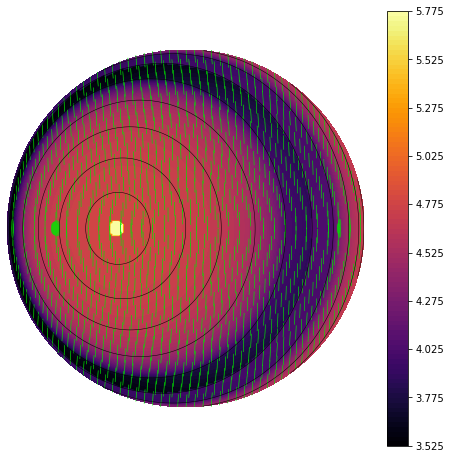

In [10]:
pfield_test

In [11]:
# calculate the mean intensity over the surface for a range of photon energies
pfield_test.calcvalues(mysurfmodel,gtt=(1-2*2.0/10.0)**0.5)

In [12]:
ivec=pfield_test.iint
qvec=pfield_test.qint

## Let's do some plots

In [13]:
# load a datafile
datae,dataf=np.loadtxt('4U_0142+614.dat',unpack=True,usecols=(0,1))

In [14]:
# get the mean intensities and energy bins for the orientation
ee=pfield_test.ebins
# load a file with the interstellar absorption model
eabs,sabs=np.loadtxt('tbabs.dat',unpack=True)
sabs=sabs
ii=np.argsort(eabs)
eabs=eabs[ii]
sabs=sabs[ii]
# absorption cross-section per hydrogen atom in units of 1e-24 cm^2 for our energy bins
ssabs=np.interp(ee,eabs,sabs)/(ee)**3*1e-24
# the best-fit hydrogen column is 0.52e22 /cm2
totabs=np.exp(-0.45e22*ssabs)

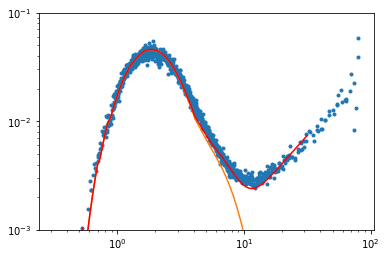

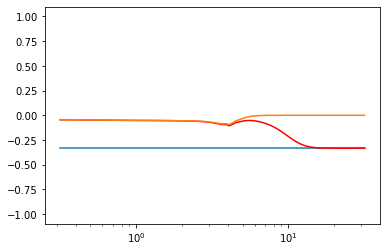

In [15]:
# plot the model against the data
mm=np.interp(datae,ee,totabs*ee*ivec) 
norm=np.mean(dataf[(datae>1) & (datae<4)])/np.mean(mm[(datae>1) & (datae<4)])
plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*ee*ivec*norm)
plt.loglog(ee,totabs*(ee*ivec*norm+ee**1.3/1.2e4),'r')
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot(ee,(-ee**1.3/1.2e4/3+ee*qvec*norm)/(ee*ivec*norm+ee**1.3/1.2e4),'r')
plt.plot(ee,qvec/ivec)
#plt.plot([ee[0],ee[-1]],[-1.0,-1.0],'k')
plt.xscale("log")
plt.ylim(-1.1,1.1)
plt.show()

# Work with all orientations

## Load the orientation files

In [16]:
import glob
pfieldarray_test=Magnetar.pfield_array().loaddata(glob.glob('Sample_Pfields/pfield_models_QED/*'))

## Calculate the mean intensities for all orientations and energies

In [17]:
pfieldarray_test.calcvalues(mysurfmodel,gtt=(1-2*2.0/10.0)**0.5)

/home/idies/workspace/Storage/heyl/persistent/QEDSurface/magnetar.py/Magnetar/condensed.py:218: RuntimeWarning: invalid value encountered in sqrt
  nt=sqrt(1.-epet**2/(ece*(ene-eci)))


In [18]:
print(pfieldarray_test)


#
# class pfield
#
# filename      Sample_Pfields/pfield_models_QED/pfield_5keV_0.deg
#
#   Phi[rad]  Energy[keV]            I          Q/I
           0     0.316228      4831.29  4.03403e-10
           0     0.331285      5197.57  3.99964e-10
           0      0.34706      5580.64  3.99225e-10
           0     0.363585      5982.75  4.00225e-10
           0     0.380897      6404.54  4.02605e-10
           0     0.399034      6846.14  4.06219e-10
           0     0.418034       7307.3  4.11029e-10
           0      0.43794      7787.46  4.16228e-10
           0     0.458792      8285.75  4.18765e-10
           0     0.480638      8800.95  4.20015e-10
           0     0.503524      9331.48  4.21556e-10
           0       0.5275      9875.36   4.2338e-10
           0     0.552617      10430.2  4.25487e-10
           0      0.57893      10993.1  4.27884e-10
           0     0.606496      11560.7  4.30586e-10
           0     0.635375      12129.3  4.32358e-10
           0     0.665629  

## Plot the mean intensity over the orientations

In [19]:
ivec=[pf.iint  for pf in pfieldarray_test.pfi]
qvec=[pf.qint  for pf in pfieldarray_test.pfi]
ee=pfieldarray_test.pfi[0].ebins

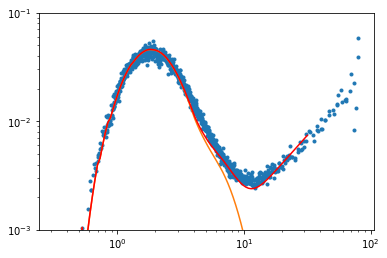

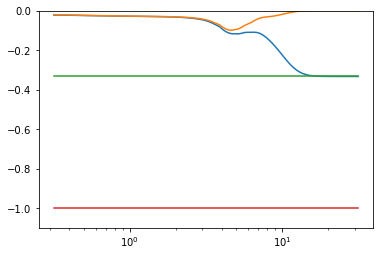

In [25]:
totivec = (ivec[0]+ivec[1]+ivec[2]+ivec[3]+ivec[4]+ivec[5]+ivec[6])/7
totqvec = (qvec[0]+qvec[1]+qvec[2]+qvec[3]+qvec[4]+qvec[5]+qvec[6])/7
mm=np.interp(datae,ee,totabs*ee*totivec) 
norm=np.mean(dataf[(datae>1) & (datae<4)])/np.mean(mm[(datae>1) & (datae<4)])

plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*totivec*ee*norm)
plt.loglog(ee,totabs*(totivec*ee*norm+ee**1.3/1.2e4),'r')
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot(ee,(-ee**1.3/1.2e4/3+ee*totqvec*norm)/(ee*totivec*norm+ee**1.3/1.2e4))
plt.plot(ee,totqvec/totivec)
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot([ee[0],ee[-1]],[-1.0,-1.0])
plt.xscale("log")
plt.ylim(-1.1,0)
plt.show()

## Plot the intensity for several orientations

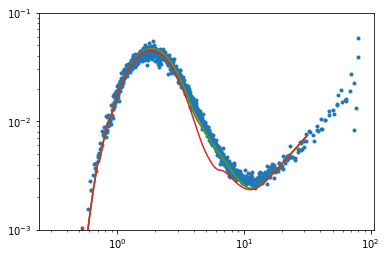

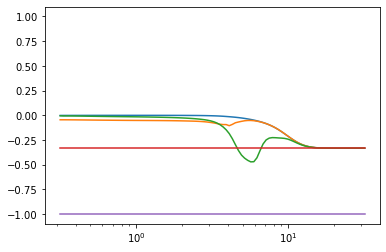

In [26]:

plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*(ee*ivec[0]*norm+ee**1.3/1.2e4))
plt.loglog(ee,totabs*(ee*ivec[3]*norm+ee**1.3/1.2e4))
plt.loglog(ee,totabs*(ee*ivec[6]*norm+ee**1.3/1.2e4))
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot(ee,(-ee**1.3/1.2e4/3+ee*qvec[0]*norm)/(ee*ivec[0]*norm+ee**1.3/1.2e4))
plt.plot(ee,(-ee**1.3/1.2e4/3+ee*qvec[3]*norm)/(ee*ivec[3]*norm+ee**1.3/1.2e4))
plt.plot(ee,(-ee**1.3/1.2e4/3+ee*qvec[6]*norm)/(ee*ivec[6]*norm+ee**1.3/1.2e4))
#plt.plot(ee,totqvec/totivec)
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot([ee[0],ee[-1]],[-1.0,-1.0])
plt.xscale("log")
plt.ylim(-1.1,1.1)
plt.show()

In [ ]:
print(cap1)